In [2]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from tqdm import tqdm
import torch
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train = pd.read_csv('./data/train.csv', index_col='PassengerId')
test = pd.read_csv('./data/test.csv', index_col='PassengerId')

In [4]:
train

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...                                                        ...     ...   ...   
887                                      Montvila, Rev. Juozas    male  27.0   
888                               Graham, Miss. Margaret Edith  female  19.0   
889                   Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890                                      Behr, Mr. Karl Howell    male  26.0   
891                                        Dooley, Mr. Patrick    male  32.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S  
...            ...    ...               ...      ...   ...      ...  
887              0      0            211536  13.0000   NaN        S  
888              0      0            112053  30.0000   B42        S  
889              1      2        W./C. 6607  23.4500   NaN        S  
890              0      0            111369  30.0000  C148        C  
891              0      0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

In [5]:
test

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
...             ...                                           ...     ...   
1305              3                            Spector, Mr. Woolf    male   
1306              1                  Oliva y Ocana, Dona. Fermina  female   
1307              3                  Saether, Mr. Simon Sivertsen    male   
1308              3                           Ware, Mr. Frederick    male   
1309              3                      Peter, Master. Michael J    male   

              Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
PassengerId                                                                   
892          34.5      0      0              330911    7.8292   NaN        Q  
893          47.0      1      0              363272    7.0000   NaN        S  
894          62.0      0      0              240276    9.6875   NaN        Q  
895          27.0      0      0              315154    8.6625   NaN        S  
896          22.0      1      1             3101298   12.2875   NaN        S  
...           ...    ...    ...                 ...       ...   ...      ...  
1305          NaN      0      0           A.5. 3236    8.0500   NaN        S  
1306         39.0      0      0            PC 17758  108.9000  C105        C  
1307         38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1308          NaN      0      0              359309    8.0500   NaN        S  
1309          NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 10 columns]

In [6]:
labels = train['Survived'].copy().astype('float32')
features = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

In [7]:
labels

PassengerId
1      0.0
2      1.0
3      1.0
4      1.0
5      0.0
      ... 
887    0.0
888    1.0
889    0.0
890    1.0
891    0.0
Name: Survived, Length: 891, dtype: float32

In [8]:
features['Sex'] = features['Sex'].map({'male': 1.0, 'female': 0.0})
features['Embarked'] = features['Embarked'].map({'C': 0.0, 'Q': 1.0, 'S': 2.0})
features['Pclass'] = features['Pclass'].astype('float32')
features['Age'] = features['Age'].astype('float32')
features['SibSp'] = features['SibSp'].astype('float32')
features['Parch'] = features['Parch'].astype('float32')
features['Fare'] = features['Fare'].astype('float32')
default_age = features['Age'].mean()
default_fare = features['Fare'].mean()
features['Age'].fillna(value=default_age, inplace=True)
features['Fare'].fillna(value=default_fare, inplace=True)
features['Parch'].fillna(value=0.0, inplace=True)
features['SibSp'].fillna(value=0.0, inplace=True)
features['Pclass'].fillna(value=4.0, inplace=True) # introduce a new class 4 'unknown class'
features['Embarked'].fillna(value=3.0, inplace=True) # introduce a new class 3 'unknown class'
features['Sex'].fillna(value=0.5, inplace=True)


In [9]:
default_age

29.699118

In [10]:
features

Pclass  Sex        Age  SibSp  Parch       Fare  Embarked
PassengerId                                                           
1               3.0  1.0  22.000000    1.0    0.0   7.250000       2.0
2               1.0  0.0  38.000000    1.0    0.0  71.283302       0.0
3               3.0  0.0  26.000000    0.0    0.0   7.925000       2.0
4               1.0  0.0  35.000000    1.0    0.0  53.099998       2.0
5               3.0  1.0  35.000000    0.0    0.0   8.050000       2.0
...             ...  ...        ...    ...    ...        ...       ...
887             2.0  1.0  27.000000    0.0    0.0  13.000000       2.0
888             1.0  0.0  19.000000    0.0    0.0  30.000000       2.0
889             3.0  0.0  29.699118    1.0    2.0  23.450001       2.0
890             1.0  1.0  26.000000    0.0    0.0  30.000000       0.0
891             3.0  1.0  32.000000    0.0    0.0   7.750000       1.0

[891 rows x 7 columns]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=6)

In [12]:
class MyModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.i = torch.nn.Linear(input_dim, 7)
        self.h = torch.nn.Linear(7, 5)
        self.h2 = torch.nn.Linear(5, output_dim)
        
    def forward(self, x):
        x = torch.relu(self.i(x))
        x = torch.relu(self.h(x))
        outputs = torch.sigmoid(self.h2(x))
        return outputs

In [13]:
epochs = 50_000
input_dim = 7
output_dim = 1

model = MyModel(input_dim, output_dim)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01, lr_decay=0, weight_decay=0)

In [14]:
X_train, X_test = torch.Tensor(X_train.values), torch.Tensor(X_test.values)
y_train, y_test = torch.Tensor(y_train.values), torch.Tensor(y_test.values)

In [15]:
losses = []
losses_test = []
acc = []
acc_test = []
Iterations = []
iter = 0

for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    lbls = y_train
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), lbls)
    loss.backward() 
    optimizer.step()
    
    iter+=1
    if iter%100==0:
        # calculate Accuracy
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            acc_test.append(accuracy_test)
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            acc.append(accuracy)

Training Epochs: 100%|██████████████████| 50000/50000 [00:59<00:00, 847.10it/s]


<AxesSubplot: xlabel='Iteration', ylabel='value'>

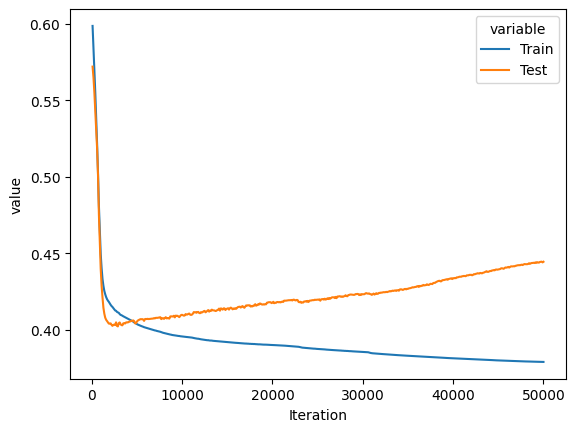

In [16]:
data = pd.DataFrame({
    'Iteration': Iterations,
    'Train': losses,
    'Test': losses_test
})

sns.lineplot(x='Iteration', y='value', hue='variable', data=pd.melt(data, ['Iteration']))

<AxesSubplot: xlabel='Iteration', ylabel='value'>

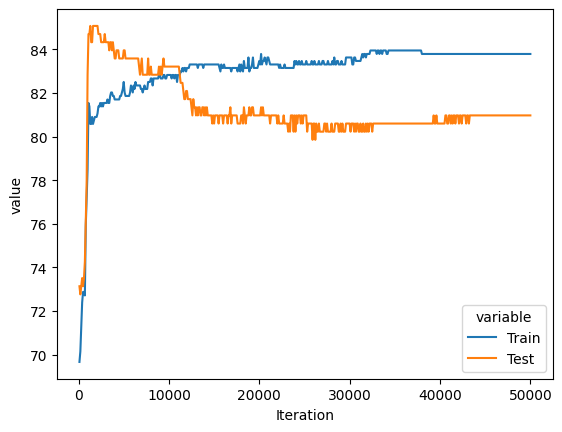

In [17]:
data = pd.DataFrame({
    'Iteration': Iterations,
    'Train': acc,
    'Test': acc_test
})

sns.lineplot(x='Iteration', y='value', hue='variable', data=pd.melt(data, ['Iteration']))

In [18]:
max(acc_test)

85.07462686567165